# Exploratory Data Analysis of data. 

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
# Analyse missing data
import missingno as msno
# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree   import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_classification
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from matplotlib import pyplot
# Cross-validation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

## Lecture of information

In [320]:
data_path = "./data"
X = pd.read_csv(f'{data_path}/x_train.csv')
y = pd.read_csv(f'{data_path}/y_train.csv')
x_testing = pd.read_csv(f'{data_path}/x_test.csv')

In [321]:
X = X[X.columns[1:]]
X.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
'Soil_Type_1', 'Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10',
'Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20',
'Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30',
'Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40']

y = y[y.columns[1:]]
y.columns=['Cover_Type']

# for testing the models
x_testing = x_testing[x_testing.columns[1:]]
x_testing.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
'Soil_Type_1', 'Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10',
'Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20',
'Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30',
'Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40']


In [322]:
DF = X.copy()
DF['CLASS'] = y
DF.to_csv('./data/DF.csv', sep=',', index=False)

In [323]:
y.shape

(406708, 1)

In [324]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           406708 non-null  int64
 1   Aspect                              406708 non-null  int64
 2   Slope                               406708 non-null  int64
 3   Horizontal_Distance_To_Hydrology    406708 non-null  int64
 4   Vertical_Distance_To_Hydrology      406708 non-null  int64
 5   Horizontal_Distance_To_Roadways     406708 non-null  int64
 6   Hillshade_9am                       406708 non-null  int64
 7   Hillshade_Noon                      406708 non-null  int64
 8   Hillshade_3pm                       406708 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  406708 non-null  int64
 10  Wilderness_Area_1                   406708 non-null  int64
 11  Wilderness_Area_2                   406708 non-null 

Let's check if is there any missing data

In [325]:
X.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


From here we can realize that there is not missing data. We can also plot the missing data using msno:

<AxesSubplot:>

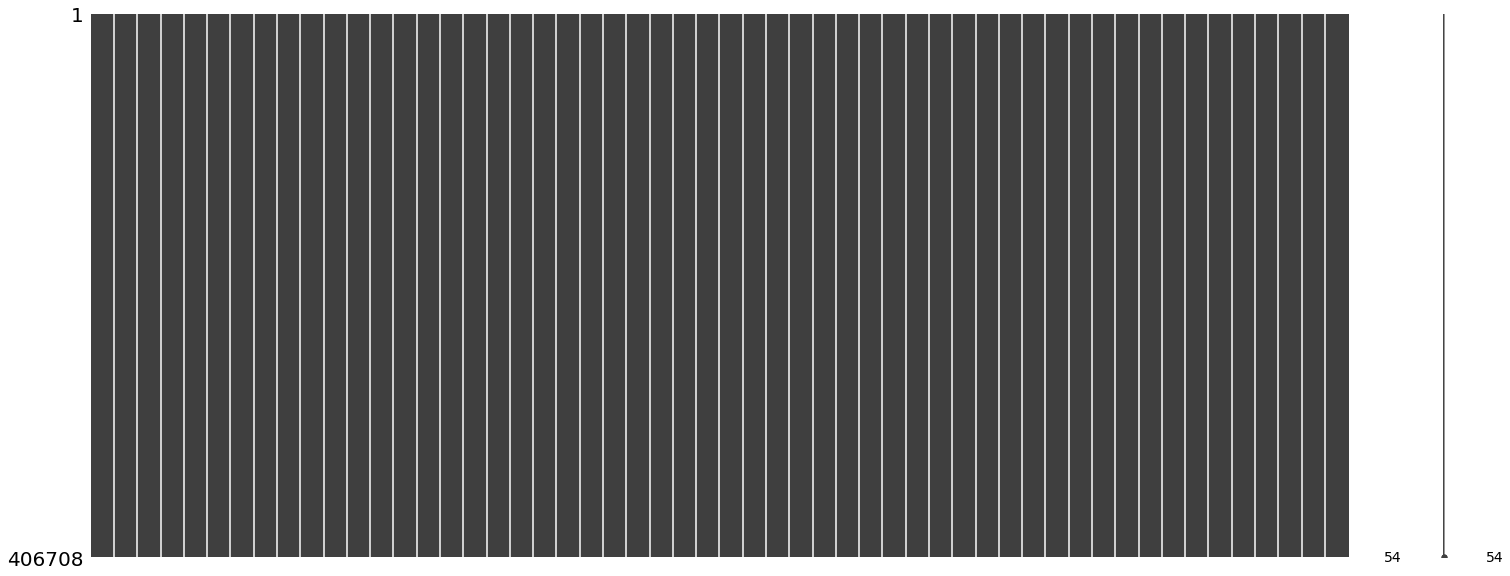

In [326]:
msno.matrix(msno.nullity_sort(X, sort='descending'))

And from here we can verify that there is not missing data at all.

<AxesSubplot:>

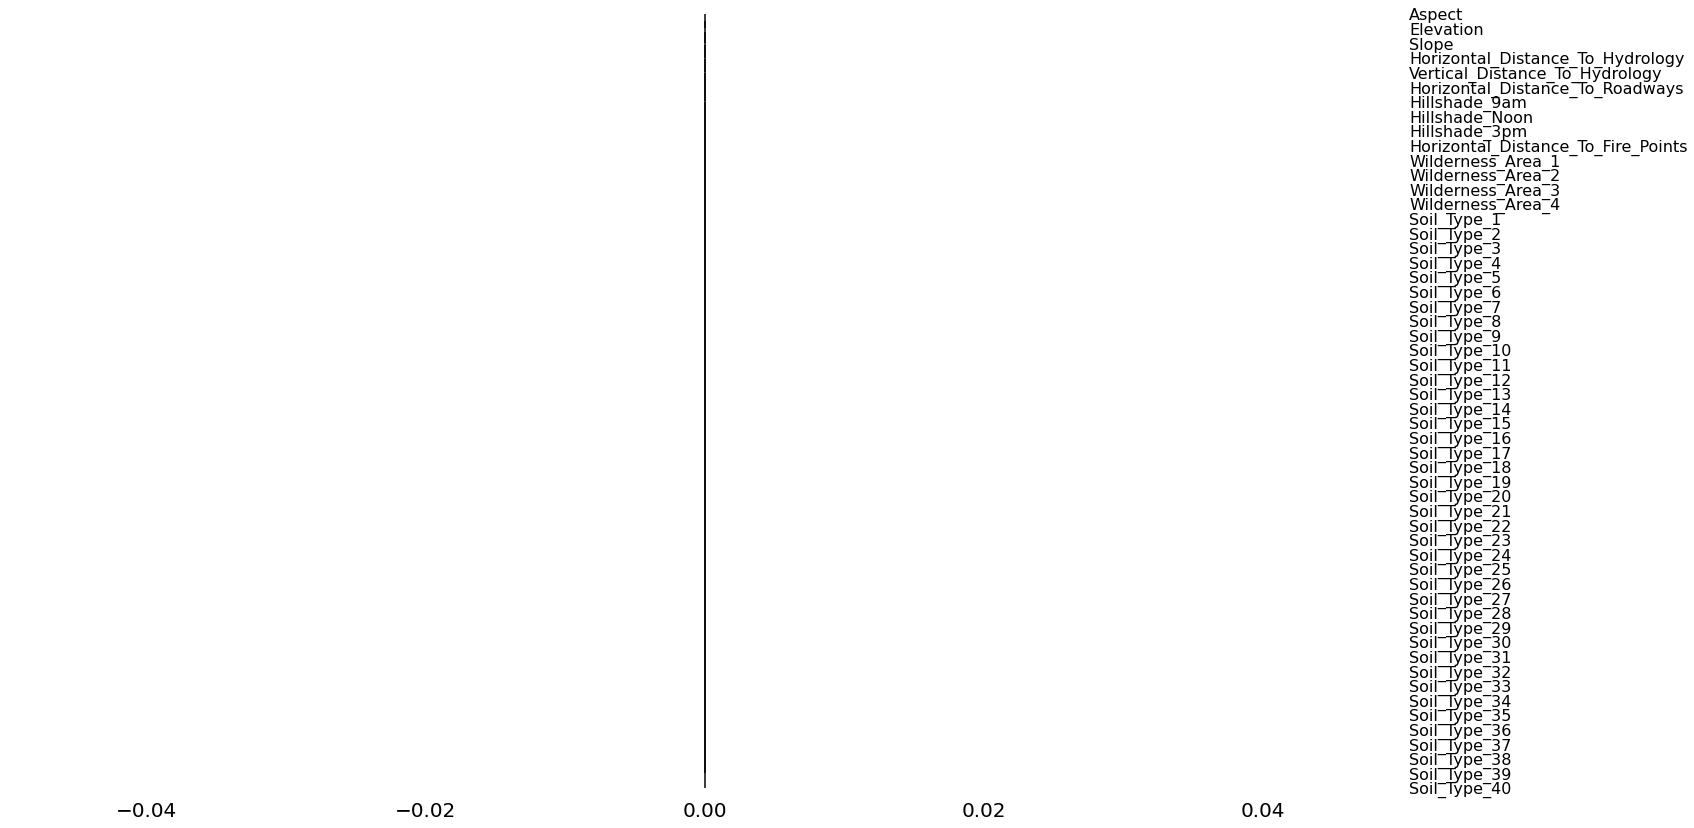

In [327]:
msno.dendrogram(X)

Conducting EDA to understand our data, lets join our target labeling or classification into the training data to try to find patterns or relationships between the variables.

In [328]:
X["target"] = y
X.groupby('target').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
target,,,,,,,,,,,,,,,,,,,,,
1,148288,148288,148288,148288,148288,148288,148288,148288,148288,148288,...,148288,148288,148288,148288,148288,148288,148288,148288,148288,148288
2,198310,198310,198310,198310,198310,198310,198310,198310,198310,198310,...,198310,198310,198310,198310,198310,198310,198310,198310,198310,198310
3,25028,25028,25028,25028,25028,25028,25028,25028,25028,25028,...,25028,25028,25028,25028,25028,25028,25028,25028,25028,25028
4,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923,...,1923,1923,1923,1923,1923,1923,1923,1923,1923,1923
5,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,...,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645
6,12157,12157,12157,12157,12157,12157,12157,12157,12157,12157,...,12157,12157,12157,12157,12157,12157,12157,12157,12157,12157
7,14357,14357,14357,14357,14357,14357,14357,14357,14357,14357,...,14357,14357,14357,14357,14357,14357,14357,14357,14357,14357


<AxesSubplot:xlabel='target', ylabel='count'>

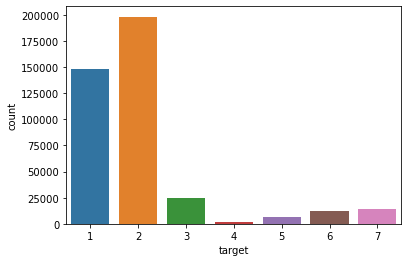

In [329]:
sns.countplot(X['target'])

Text(0.5, 0, 'Target')

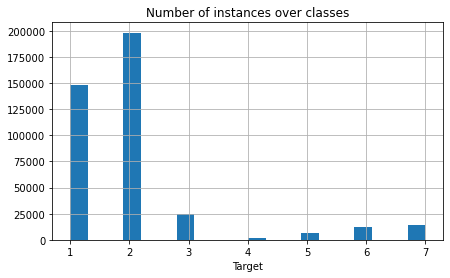

In [330]:
plt.figure(figsize=(7,4))
X['target'].hist(bins=20)
plt.title("Number of instances over classes")
plt.xlabel("Target")

Data labels are not completely balanced, class 1 and 2 are much more abundant over the dataset. Something that can easily be seen is that class 1 and 2 have a very large Elevation, Slope and aspect, indicating that this features might have a strong corrrelation  to these types of classes classification, but it can be seen from the previous table, the number of instances over the entire dataset is also bigger, showing that the data is not fully balanced, so it would explain why this two classes are much strongly present. The only exception this problem would be on the number of ocurrences over class 6 and 7, since the number of classes is similar as shown on class 1 and 2 over distances, elevation, aspect, slope, distance to hydrology and soiltypes.

In [331]:
a = X[['target', 'Elevation','Aspect', 'Slope']].groupby('target').count().reset_index()
a.head(20)

,target,Elevation,Aspect,Slope
0,1,148288,148288,148288
1,2,198310,198310,198310
2,3,25028,25028,25028
3,4,1923,1923,1923
4,5,6645,6645,6645
5,6,12157,12157,12157
6,7,14357,14357,14357


This function detects first and third quartile and interquartile range for a given column of a dataframe then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively

The quartiles divide the data into 4 equal regions. Instead of dividing by 100 in step 2, divide by 4.

Note: The 2nd quartile is the same as the median. The 1st quartile is the 25th percentile, the 3rd quartile is the 75th percentile.

The quartiles are commonly used (much more so than the percentiles or deciles). The TI-82 calculator will find the quartiles for you. Some textbooks include the quartiles in the five number summary.

Ref: https://people.richland.edu/james/lecture/m170/ch03-pos.html
    

In [332]:
def outlier_function(df, col_name):
    # Find percentil for 25 over the 
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

for column in X.columns:
    if outlier_function(X, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(X, column)[2], column))

In [333]:
display(X.describe())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,target
count,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,...,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000
mean,2959.329730,155.763309,14.103413,269.485181,46.467994,2349.097488,212.107827,223.335543,142.593190,1979.708533,...,0.090382,0.077468,0.002801,0.003236,0.000224,0.000548,0.026926,0.023734,0.015139,2.051472
std,280.028028,111.925462,7.490411,212.462577,58.327213,1559.559608,26.785128,19.777075,38.269583,1323.353986,...,0.286728,0.267333,0.052846,0.056792,0.014957,0.023410,0.161867,0.152221,0.122104,1.396507
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2995.000000,127.000000,13.000000,218.000000,30.000000,1994.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,261.000000,18.000000,390.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,599.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


From here we can see the next intervals: 


Elevation:  1859- 3858 = 1999

Aspect:	0,360 = 360

Slope: 0, 66 =66

Horizontal_Distance_To_Hydrology: 0, 1397 = 1397

Vertical_Distance_To_Hydrology: -173, 599 = 426

Horizontal_Distance_To_Roadways: 0, 7117 = 7117

Horizaontal_Distance_To_Firepoints: 0, 7173 = 7173

Hillshade_9am: 0,254

Hillshade_Noon: 0,254

Hillshade_3pm: 0, 254

Soil_Types : 0,50

So from here we can see that the columns with the highest number of points or data are Horizontal_Distance_To_Roadways and Horizaontal_Distance_To_Firepoints

In [334]:
X_cp = X.copy()
# Horizontal_Distance_To_Fire_Points

X_cp = X_cp[(X_cp['Horizontal_Distance_To_Fire_Points'] > outlier_function(X_cp, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (X_cp['Horizontal_Distance_To_Fire_Points'] < outlier_function(X_cp, 'Horizontal_Distance_To_Fire_Points')[1])]
# Horizontal_Distance_To_Roadways
X_cp = X_cp[(X_cp['Horizontal_Distance_To_Roadways'] > outlier_function(X_cp, 'Horizontal_Distance_To_Roadways')[0]) &
              (X_cp['Horizontal_Distance_To_Roadways'] < outlier_function(X_cp, 'Horizontal_Distance_To_Roadways')[1])]
X_cp.shape

(406701, 55)

In [335]:
X.shape

(406708, 55)

Noe we have 406701, before 406708, so there was not too much change since the data seems to be without many outliers

In [336]:
# list of columns of wilderness areas and soil types and verify they are hot-encoded anc therefore contain only 0 and 1
is_binary_columns = [column for column in X.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(X[is_binary_columns].values.ravel())

array([0, 1], dtype=int64)

f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(X['Elevation'])
f.add_subplot(1,2,2)
sns.boxplot(X['Elevation'])

f1 = plt.figure(figsize=(20,4))
f1.add_subplot(1,2,1)
sns.distplot(X['Aspect'])
f1.add_subplot(1,2,2)
sns.boxplot(X['Aspect'])


f2 = plt.figure(figsize=(20,4))
f2.add_subplot(1,2,1)
sns.distplot(X['Slope'])
f2.add_subplot(1,2,2)
sns.boxplot(X['Slope'])

f3 = plt.figure(figsize=(20,4))
f3.add_subplot(1,2,1)
sns.distplot(X['Horizontal_Distance_To_Hydrology'])
f3.add_subplot(1,2,2)
sns.boxplot(X['Horizontal_Distance_To_Hydrology'])


f4 = plt.figure(figsize=(20,4))
f4.add_subplot(1,2,1)
sns.distplot(X['Vertical_Distance_To_Hydrology'])
f4.add_subplot(1,2,2)
sns.boxplot(X['Vertical_Distance_To_Hydrology'])


f5 = plt.figure(figsize=(20,4))
f5.add_subplot(1,2,1)
sns.distplot(X['Horizontal_Distance_To_Roadways'])
f5.add_subplot(1,2,2)
sns.boxplot(X['Horizontal_Distance_To_Roadways'])

f6 = plt.figure(figsize=(20,4))
f6.add_subplot(1,2,1)
sns.distplot(X['Hillshade_9am'])
f6.add_subplot(1,2,2)
sns.boxplot(X['Hillshade_9am'])

f7 = plt.figure(figsize=(20,4))
f7.add_subplot(1,2,1)
sns.distplot(X['Hillshade_Noon'])
f7.add_subplot(1,2,2)
sns.boxplot(X['Hillshade_Noon'])

f8 = plt.figure(figsize=(20,4))
f8.add_subplot(1,2,1)
sns.distplot(X['Hillshade_3pm'])
f8.add_subplot(1,2,2)
sns.boxplot(X['Hillshade_3pm'])

f9 = plt.figure(figsize=(20,4))
f9.add_subplot(1,2,1)
sns.distplot(X['Horizontal_Distance_To_Fire_Points'])
f9.add_subplot(1,2,2)
sns.boxplot(X['Horizontal_Distance_To_Fire_Points'])

f10 = plt.figure(figsize=(20,4))
f10.add_subplot(1,2,1)
sns.distplot(X['target'])
f10.add_subplot(1,2,2)
sns.boxplot(X['target'])

#### Compacting soil types. 
We drop the target label again with the aim of transforming data into a more compact way.

In [337]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

### Convert hot-encode format to integer or numerical values

Now sum up soil types, since they are  hot-encoded the result will be just an integer
X["Soil_type"] = 0
x_testing["Soil_type"] = 0
for i,val in enumerate(X):
    if i>=14:  
        print(i,val)      
        #X.loc[X[val]==1,val]=i
        #x_testing.loc[x_testing[val]==1,val]=i
        X["Soil_type"]  = X["Soil_type"]  + X[val]
        x_testing["Soil_type"]  = x_testing["Soil_type"]  + x_testing[val]

In [338]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [339]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           406708 non-null  int64
 1   Aspect                              406708 non-null  int64
 2   Slope                               406708 non-null  int64
 3   Horizontal_Distance_To_Hydrology    406708 non-null  int64
 4   Vertical_Distance_To_Hydrology      406708 non-null  int64
 5   Horizontal_Distance_To_Roadways     406708 non-null  int64
 6   Hillshade_9am                       406708 non-null  int64
 7   Hillshade_Noon                      406708 non-null  int64
 8   Hillshade_3pm                       406708 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  406708 non-null  int64
 10  Wilderness_Area_1                   406708 non-null  int64
 11  Wilderness_Area_2                   406708 non-null 

In [351]:
reverse_one_hot_encode(X, 14, 53, "Soil_type")
reverse_one_hot_encode(x_testing, 14, 53, "Soil_type")


In [352]:
X['Soil_type']

0         31
1         10
2         12
3         31
4         29
          ..
406703    29
406704    10
406705    33
406706    13
406707    38
Name: Soil_type, Length: 406708, dtype: int64

# Similarly for wilderness area, for both training and the testing data
X["Wilderness_area"] = 0
x_testing["Wilderness_area"] = 0

for i,val in enumerate(X):
    if i>=10:
        if i<14:
            print(i,val)
            #X.loc[X[val]==1,val]=i
            #x_testing.loc[x_testing[val]==1,val]=i
            X["Wilderness_area"]  = X["Wilderness_area"]  + X[val]
            x_testing["Wilderness_area"]  = x_testing["Wilderness_area"]  + x_testing[val] 
print(X.Wilderness_area.value_counts())
X.groupby('Wilderness_area').count()

In [353]:
# sum of all widerness area columns
X["Wilderness_area"] = X["Wilderness_Area_1"] + X["Wilderness_Area_2"] + X["Wilderness_Area_3"] + X["Wilderness_Area_4"]

# for testing set
x_testing["Wilderness_area"] = x_testing["Wilderness_Area_1"] + x_testing["Wilderness_Area_2"] + x_testing["Wilderness_Area_3"] + x_testing["Wilderness_Area_4"]
print(X.Wilderness_area.value_counts())
X.columns


1    406708
Name: Wilderness_area, dtype: int64


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

fields = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', "Wilderness_area","Soil_type"]
X_1 = X[fields]
x_1_testing = x_testing[fields]
X_1.groupby('Wilderness_area').count()

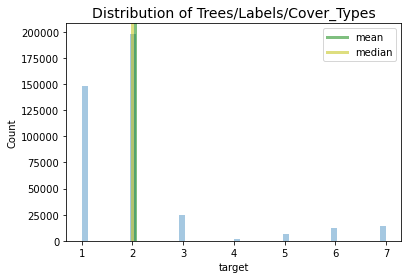

In [354]:

# set the plot size
figsize=(14,10)

# set the histogram, mean and median
sns.distplot(X["target"], kde=False)
plt.axvline(x=X.target.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=X.target.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("target")
plt.ylabel("Count")
plt.title("Distribution of Trees/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

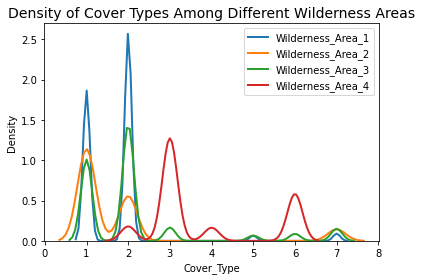

In [355]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
X['Wilderness_area'] = (X.iloc[:, 10:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(X['Wilderness_area'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
figsize=(14,10)

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = X[X['Wilderness_area'] == area]
    sns.kdeplot(subset["target"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

In [356]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

Text(0.5, 1.05, 'Pearson Correlation of All Features')

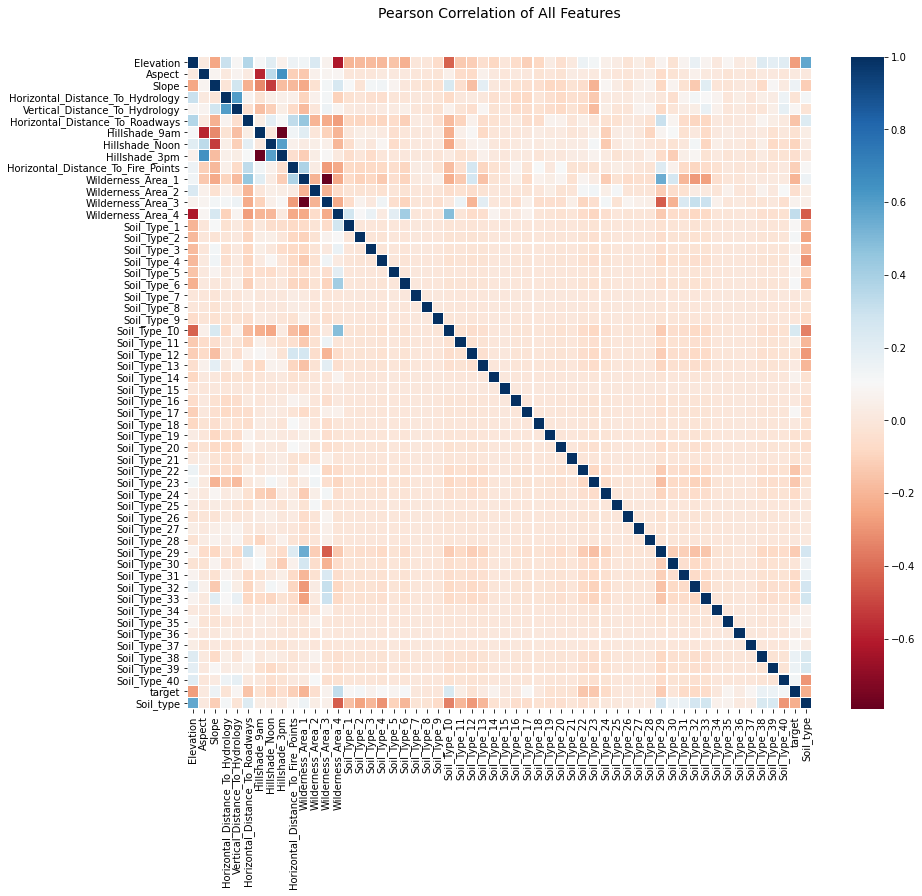

In [357]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(X.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

In [358]:
# store continious variables in a list
continuous_variables = X.columns[0:10].tolist()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
continuous_variables

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [359]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           406708 non-null  int64 
 1   Aspect                              406708 non-null  int64 
 2   Slope                               406708 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    406708 non-null  int64 
 4   Vertical_Distance_To_Hydrology      406708 non-null  int64 
 5   Horizontal_Distance_To_Roadways     406708 non-null  int64 
 6   Hillshade_9am                       406708 non-null  int64 
 7   Hillshade_Noon                      406708 non-null  int64 
 8   Hillshade_3pm                       406708 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  406708 non-null  int64 
 10  Wilderness_Area_1                   406708 non-null  int64 
 11  Wilderness_Area_2                   406

Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

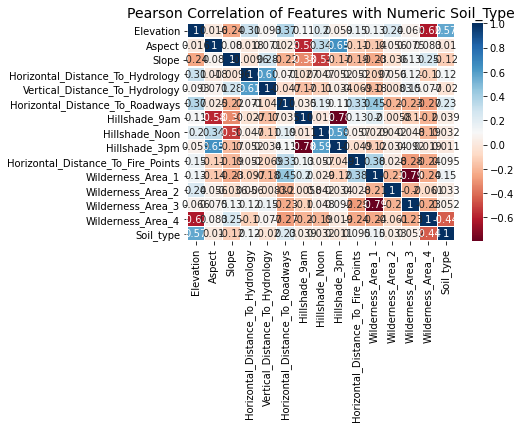

In [360]:
# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_type"]
trees_w_numeric_soil = X[all_features_w_label]
# for testing set
trees_w_numeric_soil_testing = x_testing[all_features_w_label]

# pearson coefficients with numeric soil type column
correlations = pd.DataFrame(trees_w_numeric_soil.corr())

figsize=(16,14)

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(correlations,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)

In [361]:
trees_w_numeric_soil['Soil_type']

0         31
1         10
2         12
3         31
4         29
          ..
406703    29
406704    10
406705    33
406706    13
406707    38
Name: Soil_type, Length: 406708, dtype: int64

In [362]:
trees_w_numeric_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           406708 non-null  int64
 1   Aspect                              406708 non-null  int64
 2   Slope                               406708 non-null  int64
 3   Horizontal_Distance_To_Hydrology    406708 non-null  int64
 4   Vertical_Distance_To_Hydrology      406708 non-null  int64
 5   Horizontal_Distance_To_Roadways     406708 non-null  int64
 6   Hillshade_9am                       406708 non-null  int64
 7   Hillshade_Noon                      406708 non-null  int64
 8   Hillshade_3pm                       406708 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  406708 non-null  int64
 10  Wilderness_Area_1                   406708 non-null  int64
 11  Wilderness_Area_2                   406708 non-null 

This shows that certain cover types can be found with some especific wilderness areas, therefore this is an important feature

# Feature engineering 

In [363]:
trees_w_numeric_soil.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_type'],
      dtype='object')

In [364]:
# add columns for training set
trees_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 +trees_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
trees_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_w_numeric_soil['Elevation'] +trees_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
trees_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
trees_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] +trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2


In [365]:
# for testing set
trees_w_numeric_soil_testing['Euclidian_Distance_To_Hydrology'] = (trees_w_numeric_soil_testing['Horizontal_Distance_To_Hydrology']**2 + trees_w_numeric_soil_testing['Vertical_Distance_To_Hydrology']**2)**0.5

trees_w_numeric_soil_testing['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_w_numeric_soil_testing['Elevation'] +trees_w_numeric_soil_testing['Vertical_Distance_To_Hydrology'])/2

trees_w_numeric_soil_testing['Mean_Distance_Hydrology_Firepoints'] = (trees_w_numeric_soil_testing['Horizontal_Distance_To_Hydrology'] +  trees_w_numeric_soil_testing['Horizontal_Distance_To_Fire_Points'])/2
trees_w_numeric_soil_testing['Mean_Distance_Hydrology_Roadways'] = (trees_w_numeric_soil_testing['Horizontal_Distance_To_Hydrology'] + trees_w_numeric_soil_testing['Horizontal_Distance_To_Roadways'])/2
trees_w_numeric_soil_testing['Mean_Distance_Firepoints_Roadways'] = (trees_w_numeric_soil_testing['Horizontal_Distance_To_Fire_Points'] + trees_w_numeric_soil_testing['Horizontal_Distance_To_Roadways'])/2

In [366]:
import numpy as np
#trees_w_numeric_soil = X[all_features_w_label]
# add sqrt transformed columns to the trees_w_numeric_soil dataframe
for i,col in enumerate(trees_w_numeric_soil):
    print(i,col)
    if col == 'target':
        next
    else:
        a = pd.to_numeric(trees_w_numeric_soil[col], downcast='float')
        trees_w_numeric_soil["sqrt" + col] = np.sqrt(a)
        # testing set
        b = pd.to_numeric(trees_w_numeric_soil_testing[col], downcast='float')
        trees_w_numeric_soil_testing["sqrt" + col] = np.sqrt(b)

0 Elevation
1 Aspect
2 Slope
3 Horizontal_Distance_To_Hydrology
4 Vertical_Distance_To_Hydrology
5 Horizontal_Distance_To_Roadways
6 Hillshade_9am
7 Hillshade_Noon
8 Hillshade_3pm
9 Horizontal_Distance_To_Fire_Points
10 Wilderness_Area_1
11 Wilderness_Area_2
12 Wilderness_Area_3
13 Wilderness_Area_4
14 Soil_type
15 Euclidian_Distance_To_Hydrology
16 Mean_Elevation_Vertical_Distance_Hydrology
17 Mean_Distance_Hydrology_Firepoints
18 Mean_Distance_Hydrology_Roadways
19 Mean_Distance_Firepoints_Roadways


In [367]:
trees_w_numeric_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 40 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Elevation                                       406708 non-null  int64  
 1   Aspect                                          406708 non-null  int64  
 2   Slope                                           406708 non-null  int64  
 3   Horizontal_Distance_To_Hydrology                406708 non-null  int64  
 4   Vertical_Distance_To_Hydrology                  406708 non-null  int64  
 5   Horizontal_Distance_To_Roadways                 406708 non-null  int64  
 6   Hillshade_9am                                   406708 non-null  int64  
 7   Hillshade_Noon                                  406708 non-null  int64  
 8   Hillshade_3pm                                   406708 non-null  int64  
 9   Horizontal_Distance_To_Fir

In [368]:
trees_w_numeric_soil_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174304 entries, 0 to 174303
Data columns (total 40 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Elevation                                       174304 non-null  int64  
 1   Aspect                                          174304 non-null  int64  
 2   Slope                                           174304 non-null  int64  
 3   Horizontal_Distance_To_Hydrology                174304 non-null  int64  
 4   Vertical_Distance_To_Hydrology                  174304 non-null  int64  
 5   Horizontal_Distance_To_Roadways                 174304 non-null  int64  
 6   Hillshade_9am                                   174304 non-null  int64  
 7   Hillshade_Noon                                  174304 non-null  int64  
 8   Hillshade_3pm                                   174304 non-null  int64  
 9   Horizontal_Distance_To_Fir

In [370]:
correlations_transformed = pd.DataFrame(trees_w_numeric_soil.corr())
trees_w_numeric_soil["target"] = y
correlations_transformed = pd.DataFrame(correlations_transformed["target"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "target"].sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)

,Feature,Correlation with Cover_Type
20,sqrtElevation,-0.279948
0,Elevation,-0.268922
34,sqrtSoil_type,-0.267091
36,sqrtMean_Elevation_Vertical_Distance_Hydrology,-0.254387
16,Mean_Elevation_Vertical_Distance_Hydrology,-0.241970
14,Soil_type,-0.223385
30,sqrtWilderness_Area_1,-0.203895
10,Wilderness_Area_1,-0.203895
39,sqrtMean_Distance_Firepoints_Roadways,-0.185797
38,sqrtMean_Distance_Hydrology_Roadways,-0.165203


In [371]:
# final list of features
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]

all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_areas +
                 ['Soil_type'] + transformed_features)
X_1 = trees_w_numeric_soil[all_features]
x_testing_1 = trees_w_numeric_soil_testing[all_features]

X_2 = X_1.copy()
X_2['Horizontal_Distance_To_Hydrology'] = (X_2['Horizontal_Distance_To_Hydrology']-X_2['Horizontal_Distance_To_Hydrology'].min())/(X_2['Horizontal_Distance_To_Hydrology'].max()-X_2['Horizontal_Distance_To_Hydrology'].min())
X_1 = X_2
X_1

In [372]:
print(X_1.shape)
print(x_testing_1.shape)
print(y.shape)

(406708, 19)
(174304, 19)
(406708, 1)


In [373]:
# Store to re-use
# Cleaned
X_1.to_csv('./data/X_cleaned.csv', sep='|', index=False)
x_testing_1.to_csv('./data/X_testing.csv', sep='|', index=False)
y.to_csv('./data/y_cleaned.csv',sep='|',index=False)
# Original
X.to_csv('./data/X_original_fixed.csv', sep='|', index=False)
x_testing.to_csv('./data/X_testing_original_fixed.csv', sep='|', index=False)
y.to_csv('./data/y_original_fixed.csv',sep='|',index=False)

NameError: name 'x_1_testing' is not defined